In [2]:
!pip install sk-video

     |████████████████████████████████| 2.3MB 2.4MB/s 


In [1]:
import skvideo.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
from numba import prange
import plotly.express as px
from sklearn.cluster import KMeans
import warnings 

warnings.filterwarnings("ignore")

ModuleNotFoundError: ignored

In [0]:
video = skvideo.io.vread("/content/videoplayback.mp4")  
print(video.shape)

(1682, 360, 640, 3)


In [0]:
#Create Background Tensor
background = video[0].copy()
background.shape

(360, 640, 3)

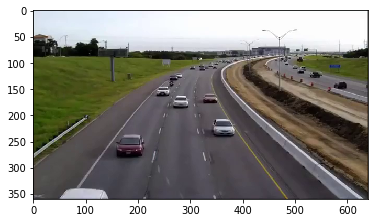

In [0]:
plt.imshow(background)
plt.show()

In [0]:
#Get random frames to speed up process
n_frames = 20
frames_idx = []
for i in range(0, n_frames):
  frames_idx.append(random.randint(0, video.shape[0]))

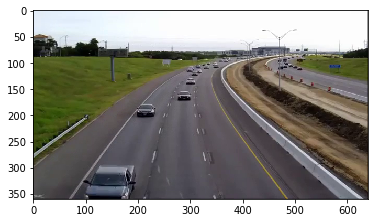

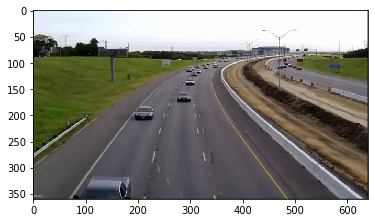

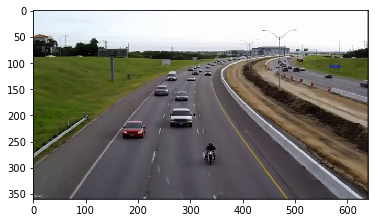

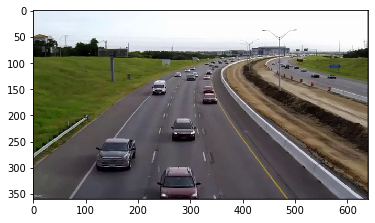

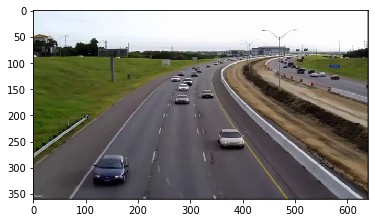

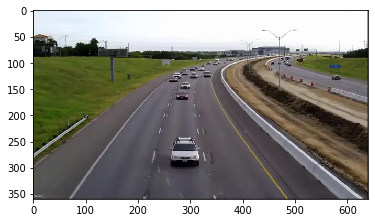

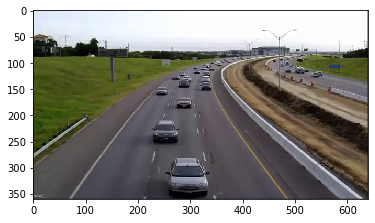

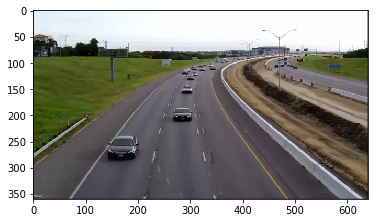

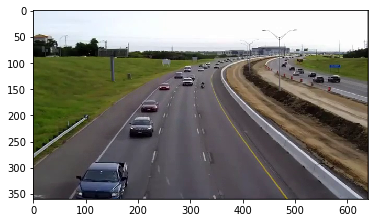

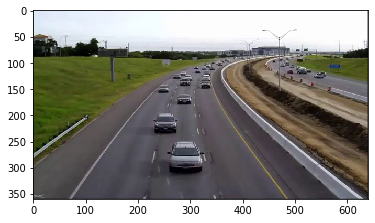

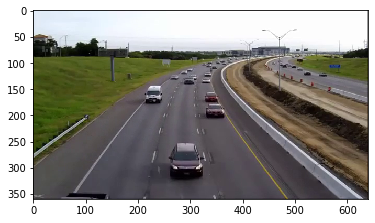

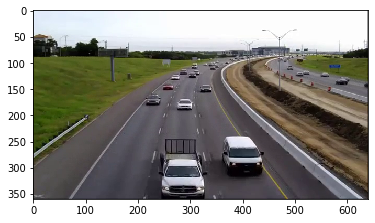

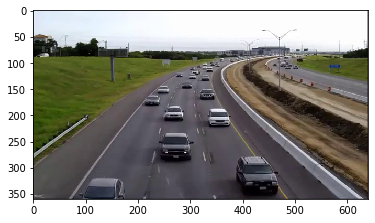

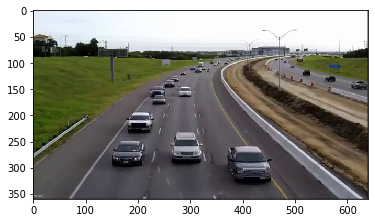

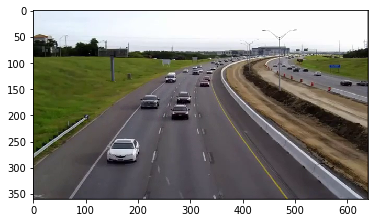

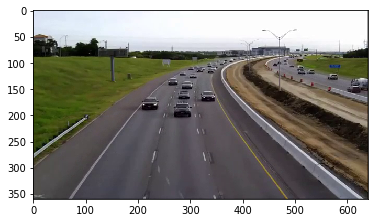

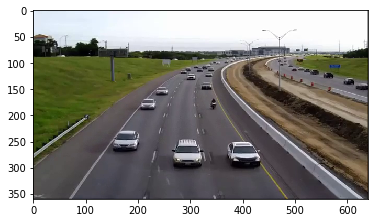

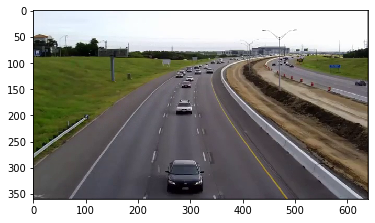

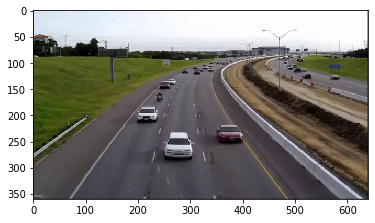

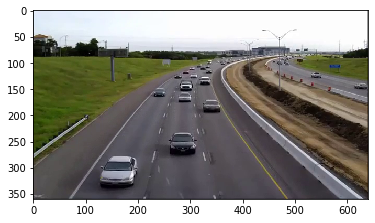

In [0]:
for frame in frames_idx:
  plt.imshow(video[frame])
  plt.show()

In [0]:
%%time
for x in prange(0, video.shape[2]):
  for y in prange(0, video.shape[1]):
    colors=[]
    for z in frames_idx:
      colors.append(video[z][y][x])
    ca = KMeans(n_clusters = 2)
    ca = ca.fit(colors)
    labels, counts = np.unique(ca.labels_, return_counts=True)
    clusters = dict(zip(labels, counts))
    most_common = max(clusters, key=clusters.get)
    background_pixel = [int(i) for i in list(ca.cluster_centers_[most_common])]
    background[y][x] = background_pixel

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/i

CPU times: user 2h 15min 48s, sys: 2min 1s, total: 2h 17min 50s
Wall time: 2h 15min 10s


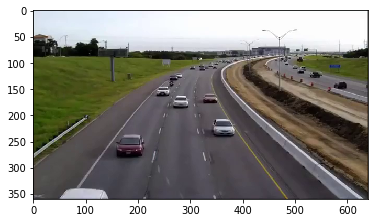

In [0]:
plt.imshow(video[0])
plt.show()

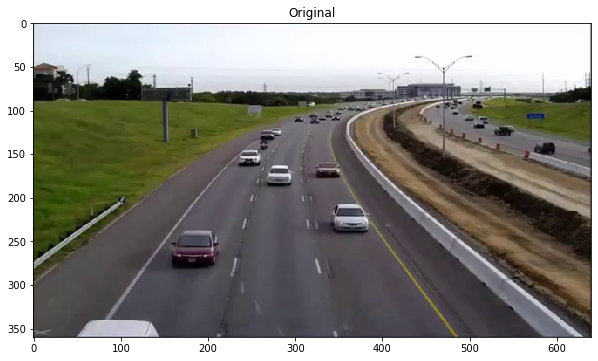

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(video[0])
plt.title("Original")
plt.show()

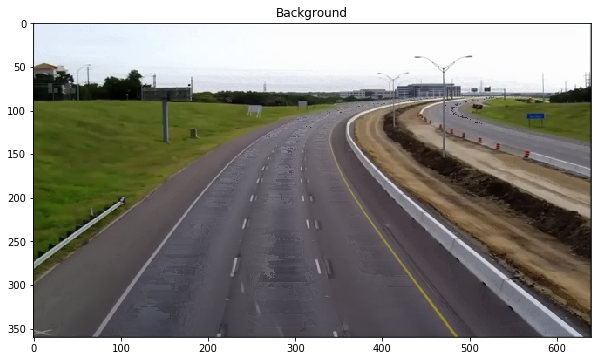

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background")
plt.show()

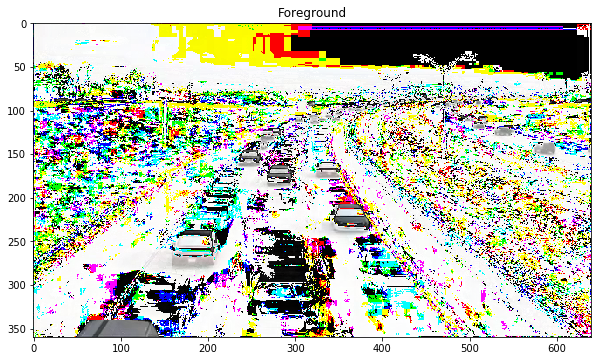

In [0]:
foreground = np.absolute(video[0] - background)
plt.figure(figsize=(10,10))
plt.imshow(foreground)
plt.title("Foreground")
plt.show()

In [0]:
pixel = pd.DataFrame(colors, columns=["R","G","B"])
pixel["label"] = km.labels_
fig = px.scatter_3d(pixel, x = "R", y = "G", z = "B", color="label")
fig.show()